# Assignment 2
## Problem 1 - Linear regression
### Create a linear regression model

In [1]:
import numpy as np #load all libraries
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import sys
import seaborn


df = pd.read_csv('hemnet.csv')

df = df[["Living_area","Selling_price"]] # extract relevant columns

#cleaaning of outliers goes here maybe

x = np.array(df['Living_area'])
y = np.array(df['Selling_price'])

x = np.delete(x, 40) #manual deletion
y = np.delete(y, 40)

x = np.delete(x, 44)
y = np.delete(y, 44)

model = LinearRegression()
model.fit(x[:,np.newaxis],y) #only because of how LinearRegression handles x-inputs?

xfit = np.linspace(np.min(x),np.max(x), len(x))
yfit = model.predict(xfit[:, np.newaxis])



ax = plt.scatter(x,y)
plt.plot(xfit,yfit)
plt.show()
#model without cleaning, clean up or just use in discussion? fix axes and legend

ModuleNotFoundError: No module named 'sklearn'

In [83]:
residuals = abs(y-yfit)
index = np.argmax(residuals)

print(index)

44


### What are the values for the intercept and slope?

In [85]:
k = model.coef_ 
k = k[0]
m = model.intercept_

print(k,m)

23597.794749444976 1809821.2159409611


### Prediction of house prices

In [79]:
values = [] #house prices for 100, 150 and 200 m2

for i in range(0,3):
    value = (100+50*i)*k+m
    values.append(value)
    
print(values)

[4162447.781415829, 5244002.860261187, 6325557.9391065445]


### Residual plot

(4825000, 5438682.774453351)


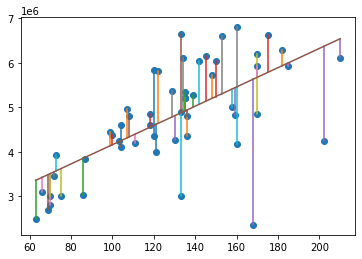

In [80]:

for i in range(len(x)):
    yPredicted = model.predict(x[:, np.newaxis]) #don't really know what I did here, ask at comp lab
    lineX=(x[i],x[i])
    lineY=(y[i],yPredicted[i])
    plt.plot(lineX,lineY)

print(lineY)
plt.scatter(x,y)
plt.plot(xfit,yfit)
plt.show()

## Problem 2 - Logistic regression

### Confusion matrix evaluation

In [81]:
# code goes here...


from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

dfdata, dftarget = load_iris(as_frame=True, return_X_y=True) #import as two dataframes, ask TA about handling of the regular data as_frame=False etc

dfdata = dfdata.set_axis(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], axis=1) #rename columns


X = dfdata.iloc[:,0:4]
Y = dftarget

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

log = LogisticRegression(max_iter=10000)
log.fit(X_train,Y_train) #making the logistic function 

Y_pred=log.predict(X_test)

confusion_matrix(Y_test, Y_pred) #it's something


array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

### K-nearest neighbor approximation

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

iris = load_iris() #import as two dataframes, ask TA about handling of the regular data as_frame=False etc

X = iris.data
Y = iris.target

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)


log = LogisticRegression(max_iter=10000)
log.fit(X_train,Y_train) #making the logistic function 

Y_pred=log.predict(X_test)

confusion_matrix(Y_test, Y_pred) #it's something

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)